# Data Visualisation

Heel veel informatie over hoe je visualisatie kan doen met behulp van matplotlib kan je vinden op deze website: https://www.python-graph-gallery.com/.
Specifiek voor pandas vind je ook op [deze](https://pandas.pydata.org/pandas-docs/stable/visualization.html) pagina veel informatie.

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Relative to reference point

### Bar diverging

Maak deze figuur zo goed mogelijk na:

![bar diverging plot](images/plot1.png)


Tips:
* Plotting function hlines
* Kleuren van de balken kan je instellen met het color argument
* De axes van een plot kan je ook opvragen met de gca() functie.
* De lijnen in de plot (de grid) kan je aanpassen met de plt.grid() functie
* De kader van het assenstelsel aanpassen kan je doen door de spines van het assenstelsel aan te passen.

,index,data
0,1,5.876909
1,6,6.093266
2,16,7.300708
3,9,9.189050
4,3,13.459255
5,0,15.461120
6,10,18.444298
7,8,21.159786
8,15,24.580880
9,13,24.673253


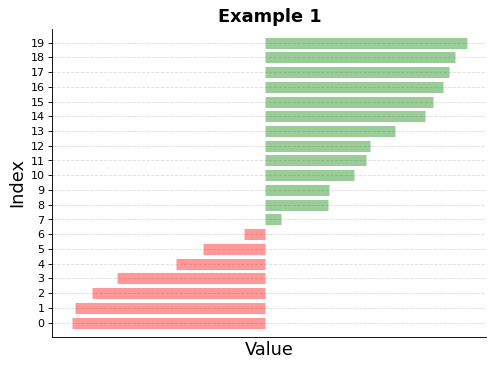

In [10]:
# aanmaken van data
df = pd.DataFrame({"data":np.random.random(size=20)*30+5}) # create random dataframe between 5 and 35
df.sort_values("data", inplace = True) # sorteer by value
df.reset_index(inplace=True) # reset index to ensure index not sorted
display(df)

plt.figure(figsize=(7,5), dpi=80)    # dots per inch geeft info over de resolutie

kleuren = ['red' if x < 20 else 'green' for x in df.data]
plt.hlines(y=df.index, xmin=20, xmax=df.data, linewidth=10, colors=kleuren, alpha=0.4) # linewidth om de lijnen breder te maken, colors om de kleuren van de balken in te stellen (per balk)
# alpha = transparantie

# instellen labels en titels
plt.title('Example 1', fontdict={'size':16, 'weight': 'bold'})
plt.gca().set_xlabel('Value', fontsize=16) # gca = get current axis
plt.gca().set_ylabel('Index', fontsize=16)

# ticks aanpassen
plt.yticks(df.index, df.index, fontsize=10)
plt.xticks([])

# grid en de spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle='--', alpha=0.4)

### Bar diverging stacked

Je kan ook verschillende balken op dezelfde figuur plaatsen.
Maak nu door gebruik te maken van de barh functie onderstaande figuur zo goed mogelijk na.

![Oef2](images/plot2.png)

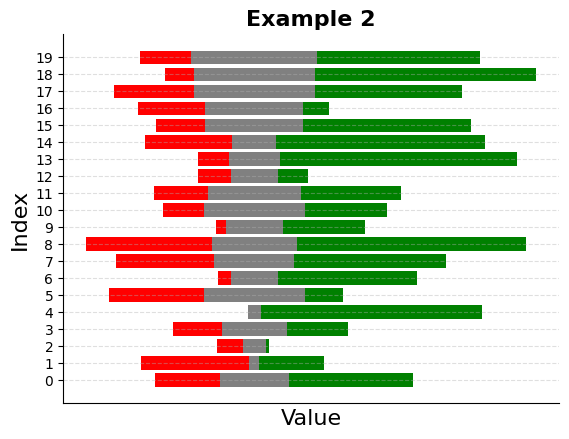

In [15]:
df = pd.DataFrame({"positive":np.random.randint(0,100, size=20),
                  "neutral": np.random.randint(0,50, size=20),
                  "negative": np.random.randint(0,50, size=20)}) # create random dataframe
df

plt.barh(df.index, df.neutral, left=-df.neutral/2, color='gray')
plt.barh(df.index, -df.negative, left=-df.neutral/2, color='red') # met negatieve width zeg je eigenlijk right ipv left
plt.barh(df.index, df.positive, left=df.neutral/2, color='green')

# instellen labels en titels
plt.title('Example 2', fontdict={'size':16, 'weight': 'bold'})
plt.gca().set_xlabel('Value', fontsize=16) # gca = get current axis
plt.gca().set_ylabel('Index', fontsize=16)

# ticks aanpassen
plt.yticks(df.index, df.index, fontsize=10)
plt.xticks([])

# grid en de spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle='--', alpha=0.4)

### Line Surplus Deficit Filled

Ook is het mogelijk om gebieden op te vullen met de **fill_between functie**.

Maak door gebruik te maken van bovenstaande functie, onderstaande figuur zo goed mogelijk na.

![plot3](images/plot3.png)

Tips: 
* subplots
* fill_between

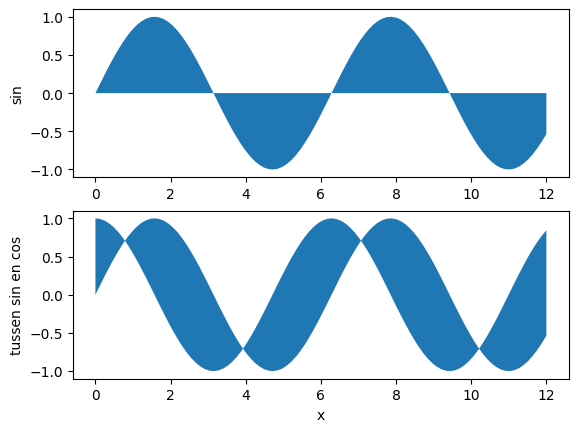

In [20]:
df = pd.DataFrame({"x": np.linspace(0, 12, 100)})
df["sin"] = np.sin(df.x)
df["cos"] = np.cos(df.x)
df

fig, (ax1, ax2) = plt.subplots(2, 1) # 2 rijen en 1 kolom

ax1.fill_between(df.x, 0, df.sin)
ax1.set_ylabel('sin')

ax2.fill_between(df.x, df.sin, df.cos)
ax2.set_ylabel('tussen sin en cos')
ax2.set_xlabel('x')

fig.savefig('example3.png')

## Verband tussen features

### Scatter plot

Reeds veel gedaan dus ga ik hier niet opnieuw tonen

### Line Column Plot

Nu gaan we kijken om te werken met twee assenstelsels.
Dit kan je doen door gebruik te maken van de **twinx()** functie. Zo krijg je een links en rechtse y-as die elk een aparte schaal kunnen hebben.
Maak hiervoor onderstaande figuur zo goed mogelijk na.

![plot4 - line column plot](images/plot4.png)

(0.0, 10000.0)

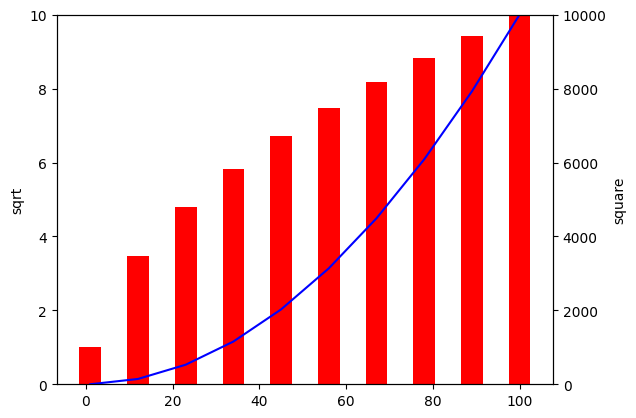

In [23]:
df = pd.DataFrame({"x": np.linspace(1, 100, 10)})
df["square"] = df.x * df.x
df["sqrt"] = np.sqrt(df.x)
df

plt.figure()
plt.ylim(0.0, 10.0)                                                 # NIEUW
plt.bar(df.x, df.sqrt, 5, color='red')
plt.ylabel('sqrt')

ax2 = plt.twinx() # creates a second y-axis on the right            NIEUW
ax2.plot(df.x, df.square, color='blue')
ax2.set_ylabel('square')
ax2.set_ylim(0.0, 10000.0)                                          # NIEUW

### Connected scatter plot

Om een geconnecteede scatter plot te maken zijn er twee paden die je kan volgen.
* Ofwel zorg je ervoor dat je zowel een line plot als een scatter plot tekend waardoor de punten aangegeven worden. Let op dat hierbij de data in de juiste volgorde moet staan
* Ofwel gebruik je markers in de line-plot om de datapunten aan te geven. Zie [hier](https://matplotlib.org/stable/api/markers_api.html) voor meer info

Kies een methode en maak onderstaande figuur zo goed mogelijk na

![connected scatter plot](images/plot5.png)

In [ ]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1
df

plt.figure()

### Bubble plot

Een bubble plot kan je maken door de **size** parameter van een scatter plot te laten afhangen van een aparte rij.

Oefen dit door deze figuur zo goed mogelijk na te maken:

![bubble plot](images/plot6.png)

In [ ]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1
df["size"] = np.random.random(size=20) * 1000
df


### XY - heatmap

Dit hebben we ook reeds gedaan bij de correlatie matrices, die ga ik nu niet overdoen. Binnen maptlotlib kan dit met matshow. Seaborn heeft een alternatief dat [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) noemt.

## Plots voor verbanden met de tijd

### (Stacked) Area plot

Met behulp van de stackplot functie kan je verschillende plots boven elkaar leggen.
Oefen dit door onderstaande figuur zo goed mogelijk na te bouwen

![plot 7](images/plot7.png)

In [ ]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y1"] = np.random.randint(10, 20, size=20)
df["y2"] = np.random.randint(5, 40, size=20)
df["y3"] = np.random.randint(0, 10, size=20)
df

### Fan plot

Een andere belangrijke plot is een fan plot. Deze kan bijvoorbeeld gebruikt worden om fouten op voorspellingen aan te geven.
Hiervoor moet er vanaf een bepaald punt (het punt waarop de voorspellingen beginnen) een area opgevuld worden om de mogelijke fout aan te geven.

Om dit in te oefenen, maak onderstaande figuur na
De meeste functies hiervoor heb je reeds gezien. Enkel voor de grijze zone na te bootsen kan je gebruik maken van axvspan()

![plot 8](images/plot8.png)

In [ ]:
df = pd.DataFrame({"x": np.arange(0, 50)})
df["y"] = np.random.randint(10, 100, size=50)
df_errors = df.tail(10).copy()
df_errors["error_1"] = 50 * 0.2 * (df_errors.x-df_errors.x.min()) / len(df_errors)
df_errors["error_2"] = 50 * 0.5 * (df_errors.x-df_errors.x.min()) / len(df_errors)
df_errors["error_3"] = 50 * 0.7 * (df_errors.x-df_errors.x.min()) / len(df_errors)
df

### Circles Timeline Plot

Dit kan gegenereerd worden door middel van een scatter plot waar de x-as de tijd is (of een index), de y waarde is een constante (bijvoorbeeld 0) en de bubble size is dan de bijhorende waarde

Probeer dit zelf eens uit met onderstaande data om deze figuur zo goed mogelijk na te maken

![plot 9](images/plot9.png)

## Sorteren / Volgorde van data

### Lollipop chart

Hiervoor kan je de stem functie gebruiken. Meer informatie over deze functie kan je vinden op [deze website](https://www.python-graph-gallery.com/lollipop-plot/)
Deze kan je inoefenen door onderstaande figuur na te bootsen

![plot 10](images/plot10.png)